# SMS SPAM DETECTION

The SMS Spam Detection dataset is a collection of text messages, specifically designed for the development
and evaluation of machine learning models aimed at identifying spam or unwanted messages in SMS communication.
The dataset comprises a diverse set of text messages, including both legitimate messages and those categorized as spam.

# PROBLEM STATEMENT



"In the era of digital communication, the proliferation of unwanted spam messages poses a significant challenge to user 
experience. In this project, we aim to develop an efficient SMS spam detection system. The dataset comprises a collection 
of labeled SMS messages, where each message is categorized as spam or ham. Our objective is to build a machine learning model 
that can accurately identify and filter out spam messages, enhancing user communication and minimizing the impact of 
unsolicited content. The success of this project will contribute to a more secure and user-friendly messaging experience 
for our users."

# OBJECTIVE:

The primary objective of this project is to design and implement an effective SMS spam detection system using machine learning 
techniques. By leveraging the SMS Spam Detection dataset, our goal is to develop a robust model capable of accurately
distinguishing between legitimate and spam messages in real-time. The project aims to address the growing challenge of 
unwanted messages that users receive through SMS, enhancing user experience and privacy.

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
ps = PorterStemmer()
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


In [2]:
df = pd.read_csv(r'D:\siddhi\sms_spam\spam.csv', encoding='cp1252')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3638,ham,Wat's da model num of ur phone?,NaN,NaN,NaN
3400,ham,Thanks honey. Have a great day.,NaN,NaN,NaN
5397,ham,That's necessarily respectful,NaN,NaN,NaN
4951,spam,"Welcome to Select, an O2 service with added be...",NaN,NaN,NaN
2294,spam,You have 1 new message. Please call 08718738034.,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.sample(5)

,v1,v2
560,ham,Hi msg me:)i'm in office..
1081,ham,Can u get pic msgs to your phone?
4676,ham,Wewa is 130. Iriver 255. All 128 mb.
2772,ham,Still in customer place
2920,ham,"Yo, any way we could pick something up tonight?"


In [9]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(10)

,target,text
1328,ham,My exam is for february 4. Wish you a great day.
672,spam,Get ur 1st RINGTONE FREE NOW! Reply to this ms...
2478,ham,Not yet. Just i'd like to keep in touch and it...
243,ham,Although i told u dat i'm into baig face watch...
4220,ham,Plz note: if anyone calling from a mobile Co. ...
2175,ham,I'm at work. Please call
4206,ham,"Lets use it next week, princess :)"
40,ham,Pls go ahead with watts. I just wanted to be s...
2207,ham,Usually the body takes care of it buy making s...
115,ham,"As I entered my cabin my PA said, '' Happy B'd..."


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
# check for duplicate values
df.duplicated().sum()

403

In [15]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

## 2.EDA

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

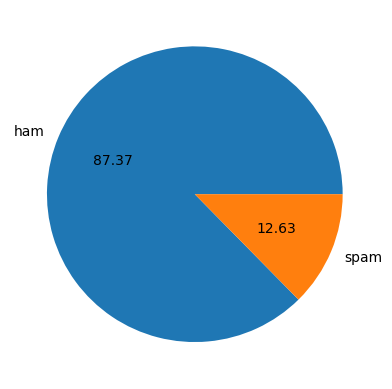

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [21]:
# Data is imbalanced

In [22]:
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Haha
[nltk_data]     CORPORATION\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
df['num_characters'] = df['text'].apply(len)

In [25]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [27]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [29]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [33]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

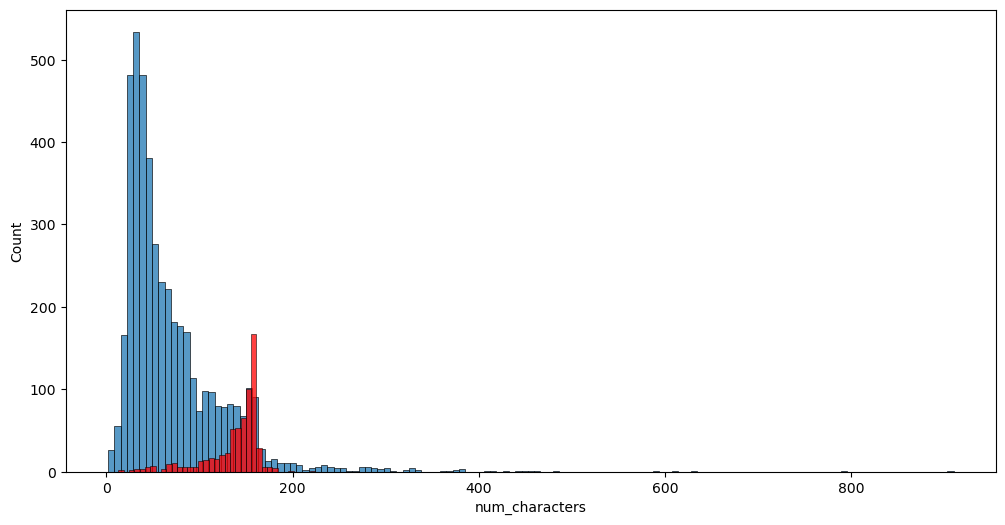

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

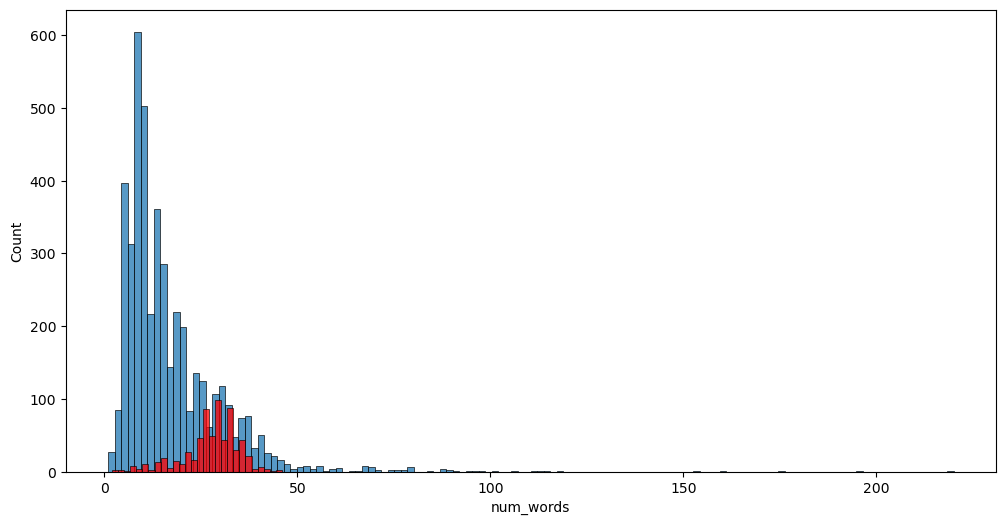

In [72]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

D:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


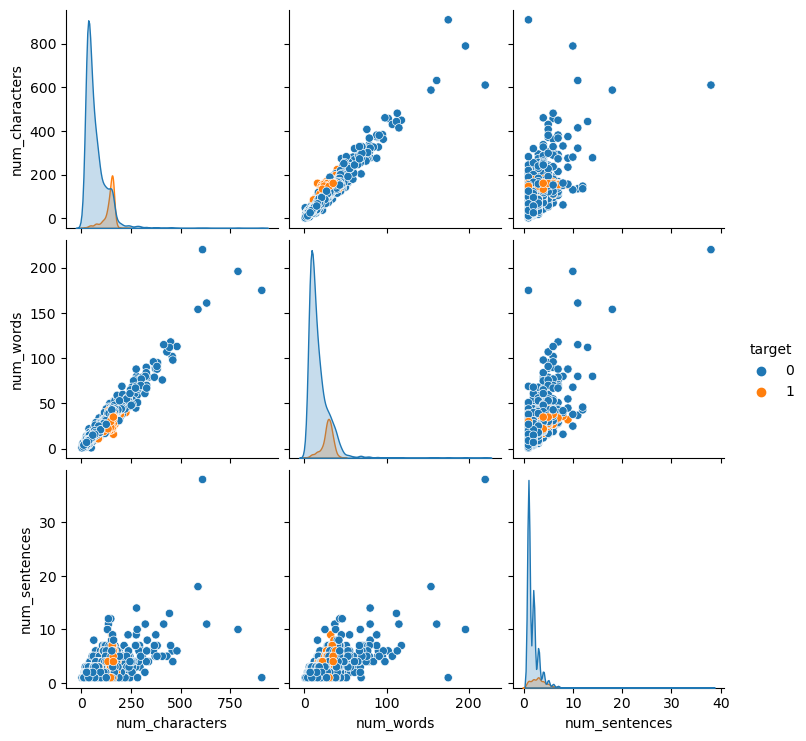

In [36]:
sns.pairplot(df,hue='target')

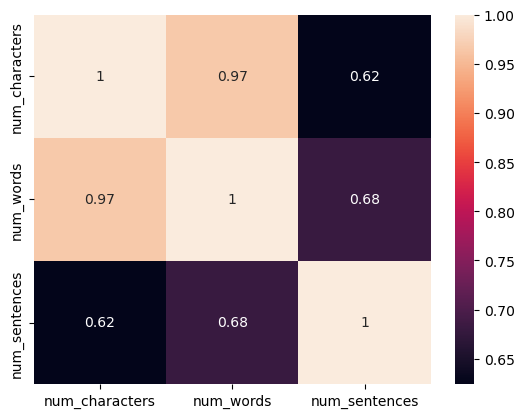

In [37]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlation for numeric columns
correlation_matrix = df[numeric_columns].corr()

# Generate heatmap
sns.heatmap(correlation_matrix, annot=True)
plt.show()


## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [35]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [39]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [37]:
df['transformed_text'] = df['text'].apply(transform_text)

In [38]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [39]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [40]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

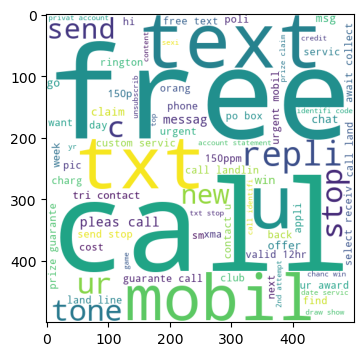

In [110]:
plt.figure(figsize=(8,4))
plt.imshow(spam_wc)

In [111]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

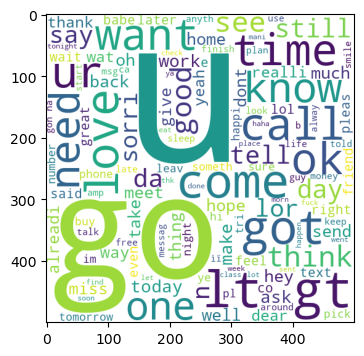

In [112]:
plt.figure(figsize=(8,4))
plt.imshow(ham_wc)

In [49]:
df.target.value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [50]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [41]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [75]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

<Axes: xlabel='Count', ylabel='Word'>

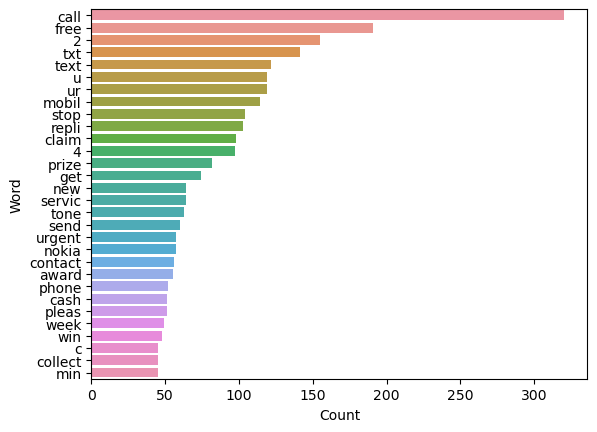

In [42]:
spam_counter = Counter(spam_corpus)

# Get the most common 30 words
most_common_words = spam_counter.most_common(30)

# Create a DataFrame from the most common words
df_most_common = pd.DataFrame(most_common_words, columns=['Word', 'Count'])

# Create a bar plot using Seaborn
sns.barplot(x='Count', y='Word', data=df_most_common)

In [ ]:
ham_counter = Counter(spam_corpus)

# Get the most common 30 words
most_common_words = ham_counter.most_common(30)

# Create a DataFrame from the most common words
df_most_common = pd.DataFrame(most_common_words, columns=['Word', 'Count'])

# Create a bar plot using Seaborn
sns.barplot(x='Count', y='Word', data=df_most_common)

In [53]:
# Text Vectorization

## 4. Model Building

In [76]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
# cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [77]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [78]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

In [79]:
# appending the num_character col to X
# X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [80]:
X.shape

(5169, 3000)

In [81]:
y = df['target'].values

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [90]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score



In [91]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [92]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [93]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [94]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [95]:
# tfidf --> MNB

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [97]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [98]:
clfs = {
#     'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [99]:

from sklearn.metrics import accuracy_score, precision_score

def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision


In [100]:
train_classifier(knc,X_train,y_train,X_test,y_test)

(0.9052224371373307, 1.0)

In [101]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9294003868471954
Precision -  0.8282828282828283
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829


D:\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [134]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [135]:
performance_df

,Algorithm,Accuracy,Precision
0,KN,0.900387,1.000000
1,NB,0.959381,1.000000
4,RF,0.971954,1.000000
7,ETC,0.972921,0.982456
5,AdaBoost,0.961315,0.945455
9,xgb,0.972921,0.943548
3,LR,0.951644,0.940000
8,GBDT,0.952611,0.923810
6,BgC,0.958414,0.862595
2,DT,0.936170,0.846154


In [136]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [137]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.900387
1,NB,Accuracy,0.959381
2,RF,Accuracy,0.971954
3,ETC,Accuracy,0.972921
4,AdaBoost,Accuracy,0.961315
5,xgb,Accuracy,0.972921
6,LR,Accuracy,0.951644
7,GBDT,Accuracy,0.952611
8,BgC,Accuracy,0.958414
9,DT,Accuracy,0.936170


D:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


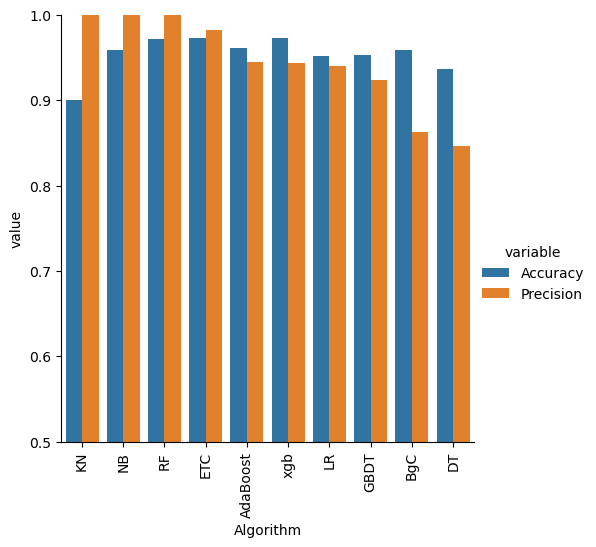

In [138]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [113]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
temp_df

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.905222,1.000000
1,NB,0.970986,1.000000
4,RF,0.975822,0.982906
7,ETC,0.974855,0.974576
3,LR,0.958414,0.970297
5,AdaBoost,0.960348,0.929204
9,xgb,0.967118,0.926230
8,GBDT,0.946809,0.919192
6,BgC,0.958414,0.868217
2,DT,0.929400,0.828283


In [114]:
temp_df1 = pd.melt(temp_df, id_vars = "Algorithm")

D:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


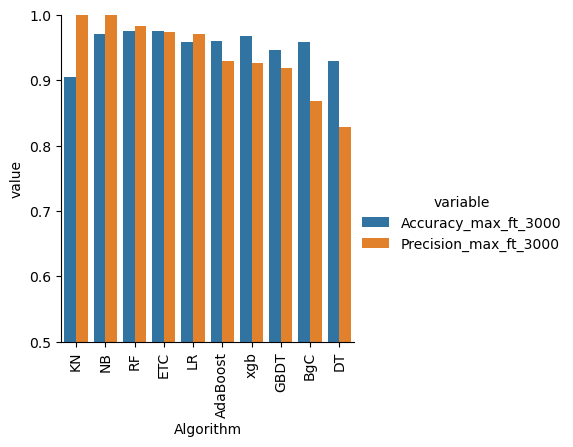

In [117]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=temp_df1, kind='bar',height=4)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [181]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [161]:
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.900387,1.000000,0.905222,1.000000
1,NB,0.959381,1.000000,0.970986,1.000000
2,RF,0.971954,1.000000,0.975822,0.982906
3,ETC,0.972921,0.982456,0.974855,0.974576
4,AdaBoost,0.961315,0.945455,0.960348,0.929204
5,xgb,0.972921,0.943548,0.967118,0.926230
6,LR,0.951644,0.940000,0.958414,0.970297
7,GBDT,0.952611,0.923810,0.946809,0.919192
8,BgC,0.958414,0.862595,0.958414,0.868217
9,DT,0.936170,0.846154,0.927466,0.811881


In [184]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling
0,KN,0.900387,1.000000,0.905222,1.000000,0.905222,0.976190
1,NB,0.959381,1.000000,0.970986,1.000000,0.978723,0.946154
2,RF,0.971954,1.000000,0.975822,0.982906,0.975822,0.982906
3,ETC,0.972921,0.982456,0.974855,0.974576,0.974855,0.974576
4,AdaBoost,0.961315,0.945455,0.960348,0.929204,0.960348,0.929204
5,xgb,0.972921,0.943548,0.967118,0.926230,0.967118,0.926230
6,LR,0.951644,0.940000,0.958414,0.970297,0.967118,0.964286
7,GBDT,0.952611,0.923810,0.946809,0.919192,0.946809,0.919192
8,BgC,0.958414,0.862595,0.958414,0.868217,0.958414,0.868217
9,DT,0.936170,0.846154,0.927466,0.811881,0.927466,0.811881


In [185]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [186]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling,Accuracy_num_chars,Precision_num_chars
0,KN,0.900387,1.000000,0.905222,1.000000,0.905222,0.976190,0.905222,0.976190
1,NB,0.959381,1.000000,0.970986,1.000000,0.978723,0.946154,0.978723,0.946154
2,RF,0.971954,1.000000,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,ETC,0.972921,0.982456,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
4,AdaBoost,0.961315,0.945455,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
5,xgb,0.972921,0.943548,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230
6,LR,0.951644,0.940000,0.958414,0.970297,0.967118,0.964286,0.967118,0.964286
7,GBDT,0.952611,0.923810,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
8,BgC,0.958414,0.862595,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217
9,DT,0.936170,0.846154,0.927466,0.811881,0.927466,0.811881,0.927466,0.811881


In [74]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [75]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [76]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [77]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [78]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [79]:
from sklearn.ensemble import StackingClassifier

In [80]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [81]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.946969696969697


In [83]:
import pickle
pickle.dump(tfidf,open('s_vectorizer.pkl','wb'))
pickle.dump(mnb,open('s_model.pkl','wb'))

# FINAL MODEL

# CONCLUSION

In conclusion, the development and evaluation of the SMS spam detection model have provided valuable insights into its 
performance and potential for real-world application. Through a systematic approach, we have addressed key aspects of the
problem, from data exploration to model selection and evaluation. Here are the key findings and takeaways:

Data Understanding:
Thorough exploratory data analysis (EDA) revealed important characteristics of the SMS spam detection dataset, including 
the distribution of spam and non-spam messages, variations in message lengths, and potential challenges.

Preprocessing:
Effective text preprocessing techniques were applied, including cleaning, tokenization, and stemming/lemmatization,
to prepare the text data for modeling.

Model Selection:
After careful consideration, Multinomial Naive Bayes was selected as the preferred model for SMS spam
detection, given its robustness and performance on the dataset.

Evaluation Metrics:
The model's success was assessed using a combination of accuracy, precision.
These metrics provided a comprehensive understanding of the model's ability to correctly identify spam messages
while minimizing false positives and false negatives.

Performance and Generalization:
The model demonstrated percision:1.0,accuracy:97 % on the test set, indicating its effectiveness in generalizing to new, unseen messages.

Deployment Considerations:
Considerations for model deployment were addressed, including potential integration into messaging systems, real-time 
processing, and user-friendly implementation.

Ethical Considerations:
Ethical considerations related to user privacy, data usage, and potential biases were acknowledged and addressed throughout 
the development process.

Future Enhancements:
Opportunities for future enhancements were identified, including exploring advanced natural language processing techniques, continuous monitoring of model performance, and adaptation to evolving spam tactics.

Impact and User Experience:
The successful deployment of the SMS spam detection model is expected to have a positive impact on user experience by reducing 
the exposure to unwanted messages, enhancing the security and reliability of digital communication.

In summary, the SMS spam detection model has been meticulously developed, evaluated, and positioned for potential deployment.
Its success is reflected in its ability to effectively distinguish between spam and non-spam messages, and the considerations
for ethical and user-friendly deployment highlight our commitment to responsible AI practices. As technology advances, the model
can serve as a foundation for continuous improvement and adaptation to emerging challenges in the dynamic landscape of spam detection.